<a href="https://colab.research.google.com/github/AceRb6/Procesamiento_de_Lenguaje_Natural/blob/main/PL2_Parcial3_PLN_Garc%C3%ADa_Venegas_Manuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PLN – Parcial 3

#Clasificación y Agrupación de Textos
#Practica de Laboratorio 2 Agrupación de textos.

Cano Portugal Israel Daniel Arturo

García Venegas Manuel

In [ ]:
!pip install datasets
!pip install --upgrade datasets
!pip install gensim
!pip install gensim smart_open

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

#Parte 1: Preprocesamiento y Representación de Texto

In [ ]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import gdown
import re
import nltk
from google.colab import drive
import os

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from gensim.models import KeyedVectors

## Carga del dataset

In [ ]:
# Descargar dataset desde Hugging Face
dataset = load_dataset("barilan/blog_authorship_corpus", trust_remote_code=True)
# Convertir a DataFrame
df = dataset['train'].to_pandas()

display(df.head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

blog_authorship_corpus.py:   0%|          | 0.00/5.53k [00:00<?, ?B/s]

blogs.zip:   0%|          | 0.00/313M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/689793 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/37919 [00:00<?, ? examples/s]

,text,date,gender,age,horoscope,job
0,"Yeah, sorry for not writing for a whole there,...","23,November,2002",female,17,Libra,Student
1,"Yeah, so today was ok, late arrival. I'm not i...","20,November,2002",female,17,Libra,Student
2,"Yay, Tuesday...no longer Monday! Whoopie! Plus...","19,November,2002",female,17,Libra,Student
3,RAR!,"18,November,2002",female,17,Libra,Student
4,"Thought- OK...so, I'm all for midgets and what...","18,November,2002",female,17,Libra,Student


## Informacion del dataset

In [ ]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          5371 non-null   object
 1   date          5371 non-null   object
 2   gender        5371 non-null   object
 3   age           5371 non-null   int32 
 4   horoscope     5371 non-null   object
 5   job           5371 non-null   object
 6   word_count    5371 non-null   int64 
 7   texto_limpio  5371 non-null   object
 8   tokens        5371 non-null   object
dtypes: int32(1), int64(1), object(7)
memory usage: 356.8+ KB


None

,age,word_count
count,5371.000000,5371.000000
mean,23.805809,295.980451
std,7.602906,2.581374
min,13.000000,292.000000
25%,17.000000,294.000000
50%,24.000000,296.000000
75%,26.000000,298.000000
max,48.000000,300.000000


In [ ]:
# estadistica del texto
df['text'].apply(len).describe()

,text
count,5371.000000
mean,1607.354496
std,128.112605
min,1240.000000
25%,1531.000000
50%,1590.000000
75%,1662.000000
max,4531.000000


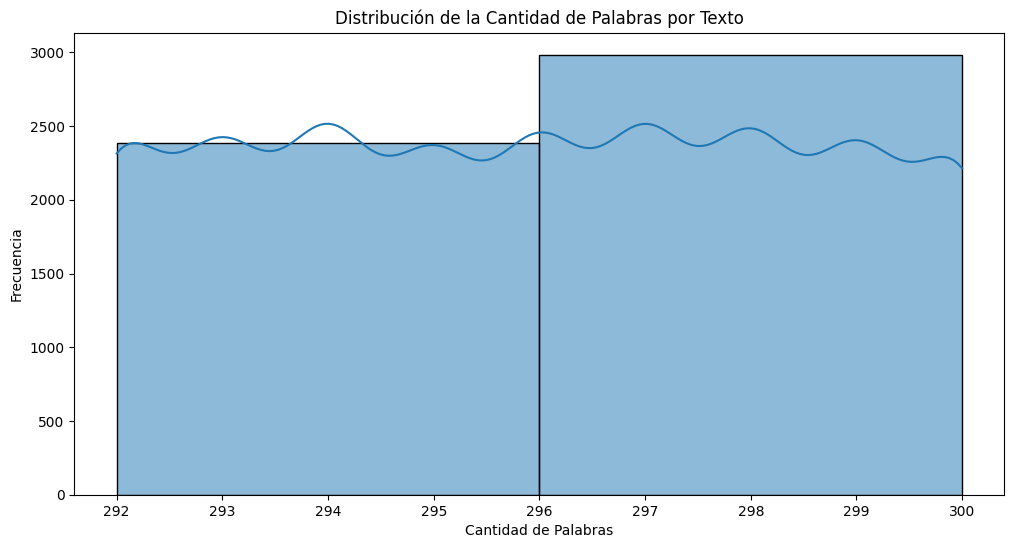

La cantidad máxima de palabras en un texto es: 300
La cantidad mínima de palabras en un texto es: 292


In [ ]:
# Calcular la cantidad de palabras en cada texto preprocesado
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Graficar la distribución de la cantidad de palabras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=2, kde=True)
plt.title('Distribución de la Cantidad de Palabras por Texto')
plt.xlabel('Cantidad de Palabras')
plt.ylabel('Frecuencia')
plt.show()

# Encontrar la cantidad máxima y mínima de palabras
max_words = df['word_count'].max()
min_words = df['word_count'].min()

print(f"La cantidad máxima de palabras en un texto es: {max_words}")
print(f"La cantidad mínima de palabras en un texto es: {min_words}")

In [ ]:
#eliminar documentos que tengan menos de 10 palabras
df = df[df['word_count'] > 291]
#eliminar documentos que tengan mas de 9000 palabras
df = df[df['word_count'] < 301]

Decidimos tomar un fragmento considerable con texto suficiente para poder analizar y que no fuera demasiado ya que habia problemas con la cantidad de documentos que hacian que Colab no pudiera procesarlo por la cantidad de ram limitada que tiene.

In [ ]:
#enumerar nuevamente el indexado de 1
df = df.reset_index(drop=True)

In [ ]:
#imprimir 10 textos random

import numpy as np
np.random.seed(42) # for reproducibility
random_indices = np.random.choice(df.index, 10, replace=False)

for i, index in enumerate(random_indices):
  print(f"--- Documento {i+1} ---")
  display(df.loc[index, 'text'])
  print("\n") # Add a newline for separation

--- Documento 1 ---


"Fresh from watching the match of Italy vs Sweden which resulted in a (another) draw. Only this time it's 1-1. The italians led first when Cassano headed a pass from Panucci. But came the second half, the italians were tired and under a lot of pressure. Just 5 minutes before the 90 minutes time is up, the swedes even the score. It was 1-1 by Ibrahimovic. The score stayed unchange until the time is up and quoting the commentator 'Italy's hope is hang by a thread'.  Honestly, I do feel disappointed (naturally). After having a glimpse of glory, I was denied by the mishap in front of the net. I'm not blaming anyone. It has been a rough european campaign for Italy. First, their opening match against the Danish resulted in a goalless draw. Then misfortune came with the form of Totti's 3 matches ban (which personally, it's not such a great loss). Now, the whole campaign hangs by a thread after another draw. But also frankly, I don't think that Italy would make it to the finals. They still hav



--- Documento 2 ---


'Yet another lazy Sunday, and I\'m still sitting around in my pajamas at noon. I just had a chunk of the giant Hershey\'s Symphony bar that\'s been laying on the countertop all weekend, tormenting me. I gave in to the choco-rapture, at long last. It\'s a bitter sweet Symphony, this life.  Last night my sister accompanied me to the MSU McNair/SROP Scholars Alumni Dinner in Lansing. We celebrated 15 years of McNair at MSU, and got to meet scholars who were in the program when it first began in 1988. I was a scholar in both 2001 and 2002. I saw a lot of old school people: Trinh, Carl, Soh, Tanya J., Erica, Terrence, Ernest T. Caldwell Jr., Charles Wells (HOT-Lanta!), and several others. It was wonderful to connect with these amazing people again and to hear where they are in their lives. And as always, it was great to see Tay. All of the alum got to get on the mic for fifteen seconds and talk about what they\'ve done since leaving McNair. I used my air time to make a 15 second plug for Fu



--- Documento 3 ---


"ECO and I are both grad students in the same department, yet we've had vastly different experiences. In fact, our grad school experiences are polar opposites.  One example is our annual committee meeting. ECO's first committee meeting was very serious. Her committee was interested in her project and gave her good suggestions for future research. Sometimes grad students bring food to their meetings, but ECO did not. Afterwards, her committee commended her for not bringing food to the meeting because food distracts from the science.  My first committee meeting was the exact opposite. On ECO's recommendation, I chose not to bring food. Whore-hey (all whiny): Where's the food? Me: There's no food. Whore-hey: What! You're required to bring food. Why else would we be here?!!! Obnoxious committee member (OCM): I'm hungry too. Why didn't you bring food!!!  Then I gave my talk. It went okay. Whore-hey and OCM didn't pay much attention and mostly gossiped amongst themselves. I got few suggestio



--- Documento 4 ---


"How time passed..it's already Friday!! man, i like Friday..it just feels so great..put aside my homework for a moment i mean. I know, homework are endless..you are given homework everyday..yeah..i mean it!&nbsp;I tried to finish my homework that's given out on that particular day..but i just..couldnt! Why?? Why?? Is there anything wrong with me? or just me..of being lazy.&nbsp;I guess so, but i dont want all these..really!! i wanna finish my homework earlier... so that i can do some other useful things, which i'm interested of course.  &nbsp;  Wanna know what are those ?? If you know me well, guess you've already have the answer..anyway, to satisfy your curiosity, things like..reading my story books..scan through the lyrics.. and all..sigh..these are some things not&nbsp;anyone will do but, that's just me.. :p  &nbsp;  I'll be going for a body check up tomorrow, kinda fear of that.God, please dont let anything to be fallen on me...Hell yeah..this leads me to the hard time that i've on



--- Documento 5 ---


'Well today was fun! I had to wake up at 8:15 though for my physical. But when I got home I slept until 2 so its all good. Tonite was one of the funnest nights I have had in a looooong time! I went to see Without a Paddle with Ben, Jessica, and Ashley. That\'s one of the funniest movies I seen in a long time. But Ben wouldn\'t shutup so I missed part of the movie. Lmao, Ben was sitting next to these "hot" girls (they were really ugly but Ben thought they were hot) and he kept askin her what school she went to and if he could have her pop and her popcorn. After a while she just stopped listening to him. And then he told me this really funny joke right during the movie and I guess something funny happened in the movie and everyone else laughed and he goes "Gees people it wasn\'t that funny!" I guess you had to be there. But you people need to go see that movie its hilarious!  And seeing Ben was soo much fun! He really doesnt take anything seriously, like unless you really want him to the



--- Documento 6 ---


"It is Saturday night again. I got your e-mail last week. I will not be staying up all night tonight looking for you to sign on. :-( I am looking forward to the middle of September when I will get to talk to you next. It seems like an eternity since we have talked. I miss being able to talk to you atleast once a week. It was very nice when you and I could talk daily. We just have to be patient. Our time will come. I am not feeling well tonight. I got me a cold the other day. It is taking its toll on me today. I am hoping that I will be over it in a day or two. I have not been writing on here much. I know that you will have enough to read when you get back online as it is. I think about you all the time. I can not wait until you get back to Hong Kong and I can send you a few things. I have the music cd's all ready for you. I have yet to make the one of me for you. I will get it done before you get back online. Things are going ok I guess. My car is broke again. One of these days I will 



--- Documento 7 ---


'Letter from Trowa-Kun that was written on a piece of paper:      Dear Trowa-Kun,           If you don\'t remember what happened upon this date, well it is when you need time alone.Sorry to bring this up but I am only writing to inform you how I feel.***           I cried as I thought about how you left without saying a word.I remember how "mad" you were. I thought you hate me; I thought how much you wish I was dead. I start to remember how you will never say "I hate you" and how much you want to "sweep me of my feet" without all of the strictions.I cried even more cause now, I ruined it; I ruined everything. I ruined your life. I bet you wish I was dead and in your head, you\'re thinking how much I am a B.I.T.C.H. I feel terrible. I feel so low and like the most hated creature on Earth.                                                     *a pic of avatar which is sad and depressed as I*          I want no hate from you nor the feeling of even one little anger. I wish only happiness fo



--- Documento 8 ---


"Sorry I havent written. My weeks are hectic, no time. Maybe i'll try to at school. Yeah...  I was so incredibly tired today. But had good food at the shakespear club party. and sable gave me this crad saying she appreciated me joining the club, so i couldnt quit. damn.   I had lots to say. Oh well. I'm too tired to write all the screwed up thoughts I hought of today but here's a taste- heckling Bush, bombing a humvee, wearing a green hexbollah headband, crying, dieing, sleeping, running to texas, making myself sick, etc.   Leilas sick..and so is June. so we might not go to Mammoth. hopefully, i wanna stay with aisha. but going there would be refreshing. Oh well, let what may come, come.  I got on the computer to fnd some weird techno aol screen and buddy lsit. weird people, the yfroze my computer a few times. My computers too slow for good graphics, not that I want them- all this technology is more stuff i dont need.  Saddam...they didnt provide any DNA evidence. I know im not alone i



--- Documento 9 ---


'Amanda is the proud owner of a well groomed 1994 Honda Accord EX (that had a Howard Dean sticker on it back in the day).  The best part of the day was seeing Amanda and her hermana in Chapel Hill, where we dropped the goods.    As time draws near, I shed some tears.  Tear. Sniff.  Last night my tae kwon do Master, Master Kim, gave me a new dobok to take to Senegal with me! It was so moving!  He said I would make a good instructor some day and they look forward to me returning.  Hopefully I will have time and can find a place in Senegal to do Tae Kwon DO.  Sweetie, dahling, I had a spa experience fit for a queen this past week.  Tres manifique.  Then more crappy shopping for the damn adventure.  It\'s draining the U2 groupie funds I tell you!  The internet rumor has it that they are going to release their new album this October or November (say Ma, all I want for my birthday is this CD express mailed!).  Then touring in February.  So......  this sounds really terrible, but when it come



--- Documento 10 ---


'Work is boring me.  Actually, there are things I could be doing, but I much rather be home getting the apartment in order.  It\'s going to be a fairly uneventful end of the week and beginning of the weekend.  Sara and Cori are leaving for law school, so I suppose I\'ll see them sometime in the next couple of evenings.  Stephen returns this evening from seeing Matt in Boston, before Matt leaves for Russia (teaching English for at least one year, maybe more).  Kevin is traveling to Philly with Kat and Allison to camp and see the Warped Tour.  Fun times for them, and they return sometime on Saturday.  I need to make my way to Philly soon to see Ryan--I\'m hoping for the beginning or mid September.  Navin comes August 20 and stays with me that weekend, then is taking the  urlLink ferry  to Toronto to get his work visa approved or something for the following week, staying with relatives.  I think I\'m going to take one or two of those days off work and take the ferry to Toronto, and its ma

## Limpieza básica:

In [ ]:
import re

def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar puntuación (todo lo que no sea letra o espacio)
    texto = re.sub(r'[^\w\s]', '', texto)

    # Eliminar números
    texto = re.sub(r'\d+', '', texto)

    # Eliminar espacios múltiples
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto

# Aplicar la función a la columna 'text'
df['texto_limpio'] = df['text'].apply(limpiar_texto)

Al leer los 10 documentos proporcionados, se observa que los textos tienen variaciones en su escritura, como mayúsculas, puntuación extraña, números, espacios innecesarios y palabras que no aportan significado (como "the", "and", "but", etc.). Por eso, fue necesario realizar una limpieza para prepararlos mejor para el análisis.

Al eliminar elementos que no aportan valor, se mejora la calidad de los resultados y se obtiene una representación más precisa del estilo de escritura de cada autor.

In [ ]:
display(df)

,text,date,gender,age,horoscope,job,word_count,texto_limpio,tokens
0,"Yeah, ummm, things are good. I made it. 5th ch...","16,April,2003",female,17,Libra,Student,293,yeah ummm things are good i made it th chair b...,yeah ummm thing good made th chair dan haha ye...
1,"So, I have a few rather random asinine things ...","13,July,2004",female,17,Libra,Student,297,so i have a few rather random asinine things t...,rather random asinin thing say right first id ...
2,Sniffers: Old tools New Methods !! Hacking a...,"01,July,2003",male,25,Sagittarius,Engineering,299,sniffers old tools new methods hacking and cra...,sniffer old tool new method hack crack term da...
3,Yesterday Uman showed me the website of his so...,"08,July,2003",female,26,Aries,Architecture,295,yesterday uman showed me the website of his so...,yesterday uman show websit son urllink aidan p...
4,Whoever reads this (if there is anyone) might ...,"25,May,2004",female,27,Virgo,Technology,292,whoever reads this if there is anyone might th...,whoever read anyon might think im take run thi...
...,...,...,...,...,...,...,...,...,...
5366,Musings of the day It's always good to be bus...,"12,November,2002",female,36,Leo,Telecommunications,299,musings of the day its always good to be busy ...,muse day alway good busi work someth sometim m...
5367,"Finally, it's the end of the work week. Howev...","06,July,2004",female,36,Leo,Telecommunications,295,finally its the end of the work week however i...,final end work week howev dont think work done...
5368,well i got alot accomplished today..i slept al...,"11,June,2003",female,16,Virgo,indUnk,292,well i got alot accomplished todayi slept alot...,well got alot accomplish todayi slept alottalk...
5369,ok this is what i have to say...im at cassies ...,"03,July,2003",female,16,Virgo,indUnk,294,ok this is what i have to sayim at cassies and...,ok sayim cassi she upset want go armi everyon ...


Haremos 6 copias del dataset, una con stopwords otra sin, y de esas dos haremos dos version cada una lematizara, y postagging aparte de la que no esta siendo afectada para poder apreciar cual podria ser el mejor caso


## Tokenización:

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Cargar lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Inicializar el stemmer (Porter Stemmer es común y efectivo)
stemmer = PorterStemmer()

def procesar_texto(texto):
    """
    Realiza:
    1. Tokenización
    2. Eliminación de stopwords
    3. Stemming (reducción a la raíz de las palabras)
    """
    # Tokenizar el texto
    tokens = word_tokenize(texto)

    # Filtrar stopwords
    tokens_sin_stopwords = [token for token in tokens if token.lower() not in stop_words]

    # Aplicar stemming
    tokens_stemmed = [stemmer.stem(token) for token in tokens_sin_stopwords]

    return tokens_stemmed

# Aplicar la función al DataFrame
df['tokens'] = df['texto_limpio'].apply(procesar_texto)

# Mostrar ejemplo
display(df[['texto_limpio', 'tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,texto_limpio,tokens
0,yeah ummm things are good i made it th chair b...,"[yeah, ummm, thing, good, made, th, chair, dan..."
1,so i have a few rather random asinine things t...,"[rather, random, asinin, thing, say, right, fi..."
2,sniffers old tools new methods hacking and cra...,"[sniffer, old, tool, new, method, hack, crack,..."
3,yesterday uman showed me the website of his so...,"[yesterday, uman, show, websit, son, urllink, ..."
4,whoever reads this if there is anyone might th...,"[whoever, read, anyon, might, think, im, take,..."


El resultado final es una columna nueva en el DataFrame llamada 'tokens', donde cada fila contiene una lista de tokens procesados , listos para ser usados en modelos de embeddings o clustering.

Este conjunto de pasos fue realizado por las siguientes razones:

* Limpieza de datos : Se eliminan elementos irrelevantes (stopwords, puntuación, números innecesarios), mejorando la calidad del análisis.
* Normalización : La conversión a minúsculas y el stemming permiten tratar distintas formas de una palabra como una sola, facilitando comparaciones.
* Preparación para embeddings : Los tokens limpios y normalizados son ideales para calcular embeddings promedio por documento, que servirán de entrada para modelos de clustering como K-means o DBSCAN.

## Representación Vectorial:

In [ ]:
if os.path.exists('glove.6B.zip'):
    os.remove('glove.6B.zip')

In [ ]:
import urllib.request
import os
import ssl

# Desactivar verificación SSL (solo para este ejemplo)
ssl._create_default_https_context = ssl._create_unverified_context

# Directorio donde se guardará GloVe
GLOVE_DIR = 'glove.6B'
os.makedirs(GLOVE_DIR, exist_ok=True)
ZIP_PATH = os.path.join(GLOVE_DIR, 'glove.6B.zip')

print("Descargando GloVe 6B 300d...")

url = 'http://nlp.stanford.edu/data/glove.6B.zip'

try:
    urllib.request.urlretrieve(url, ZIP_PATH)
    print(f"Archivo descargado exitosamente: {ZIP_PATH}")
except Exception as e:
    print(f"Error al descargar GloVe: {e}")

Descargando GloVe 6B 300d...
Archivo descargado exitosamente: glove.6B/glove.6B.zip


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
import zipfile

with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(GLOVE_DIR)

print(f"GloVe descomprimido en: {GLOVE_DIR}")

from gensim.models import KeyedVectors

glove_file = os.path.join(GLOVE_DIR, 'glove.6B.300d.txt')
model_glove = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

GloVe descomprimido en: glove.6B


Usamos GloVe porque es un modelo de embeddings preentrenados que permite representar palabras como vectores numéricos basándose en su contexto dentro de grandes corporaciones de texto. Esto ayuda a capturar relaciones semánticas entre las palabras, lo cual es útil para identificar patrones lingüísticos asociados al estilo de escritura. Al calcular un vector promedio por documento, pudimos obtener una representación numérica adecuada para aplicar técnicas de clustering no supervisado, como K-means o DBSCAN, con el fin de explorar si los textos se agrupan según el estilo asociado a la edad del autor. Además, GloVe tiene buenas propiedades globales de co-ocurrencia, lo que facilita que las palabras similares tengan vectores cercanos, mejorando así la capacidad de los modelos para detectar grupos con características lingüísticas parecidas.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def graficar_n_gramas(df, columna_tokens, ngram_range=(1,3), top_n=10):
    """
    Extrae y grafica los n-gramas más frecuentes.

    Parámetros:
    - df: DataFrame con la columna de tokens.
    - columna_tokens: nombre de la columna con tokens (ej. 'tokens').
    - ngram_range: rango de n-gramas (ej. (1,1) para unigramas).
    - top_n: cantidad de n-gramas a mostrar.
    """
    # Convertir tokens a cadena
    df[columna_tokens] = df[columna_tokens].apply(lambda x: ' '.join(x))

    # Vectorizar con CountVectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    bag_of_words = vectorizer.fit_transform(df[columna_tokens])

    # Sumar frecuencias
    sum_counts = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

    # Ordenar por frecuencia descendente
    words_freq.sort(key=lambda x: x[1], reverse=True)

    # Crear DataFrame
    df_ngramas = pd.DataFrame(words_freq[:top_n], columns=['N-grama', 'Frecuencia'])

    # Graficar
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_ngramas, x='Frecuencia', y='N-grama')
    plt.title(f'Top {top_n} {ngram_range}-gramas Más Frecuentes')
    plt.xlabel('Frecuencia')
    plt.ylabel('N-Grama')
    plt.show()

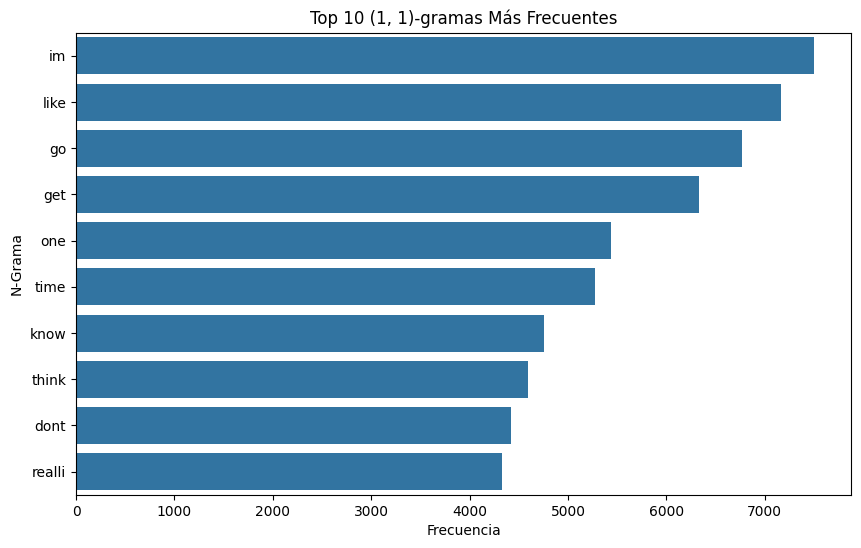

In [ ]:
graficar_n_gramas(df, 'tokens', ngram_range=(1,1), top_n=10)

El uso de n-gramas y embeddings radica en la necesidad de identificar patrones lingüísticos que permitan agrupar automáticamente los textos según su estilo asociado a la edad del autor. Los n-gramas, al extraer las palabras o frases más frecuentes, ayudan a detectar términos clave que reflejan el tono, la intención y la estructura habitual de escritura en cada documento, lo cual es fundamental para entender diferencias entre grupos etarios. Por otro lado, los embeddings, como GloVe, transforman estas palabras en vectores numéricos capaces de capturar relaciones semánticas y contextuales, lo que permite una representación más precisa y útil para aplicar técnicas de clustering no supervisado como K-means o DBSCAN.

La presencia de contracciones como im , dont y formas abreviadas como reali (posiblemente de "really") indica que los autores prefieren un estilo menos formal. Este tipo de lenguaje es común entre personas jóvenes o en entornos no académicos.

Algunas palabras como one , time , know y think son más funcionales que semánticas. Son palabras que conectan ideas pero no aportan significado específico. Sin embargo, su frecuencia elevada sugiere que los autores utilizan estructuras simples y directas para comunicarse.

Dado que el objetivo es clasificar textos según el estilo asociado a la edad del autor , estas palabras pueden ofrecer pistas sobre las tendencias lingüísticas de diferentes grupos etarios:

* Jóvenes : Las contracciones (im, dont) y palabras coloquiales (like, go) podrían estar más presentes en textos escritos por personas jóvenes.
* Adultos : Si hubiera palabras más formales o técnicas, podríamos asumir que pertenecen a adultos. Sin embargo, en este caso, el estilo parece más juvenil.

Los n-gramas más frecuentes revelan patrones importantes:

* Frecuencia alta de verbos y pronombres : (im, like, go, get) indica un estilo dinámico y centrado en acciones.
* Ausencia de stopwords avanzadas : Aunque eliminaste stopwords básicas, algunas como im y like siguen siendo frecuentes, lo cual sugiere que podrían ser relevantes para identificar estilos específicos.

## 1. Entrenamiento de los modelos.
Para este caso utilizaremos Clustering:
* K-means
* DBSCAN

# Parte 2: Entrenamiento y evaluación de modelos de clasificación no supervisada

####i. Numero optimo de K
Deberán determinar el número optimo de k usando el método del codo y silhouette score. Consideren además k de acuerdo con grupos de edad.

In [ ]:
import numpy as np

def vector_promedio(tokens, modelo):
    vectores = [modelo[word] for word in tokens if word in modelo]
    if len(vectores) > 0:
        return np.mean(vectores, axis=0)
    else:
        return np.zeros(modelo.vector_size)

df['embedding'] = df['tokens'].apply(lambda x: vector_promedio(x, model_glove))


X = np.vstack(df['embedding'].values)


Contamos cuántos grupos de edad distintos hay en el dataset limpio:


In [ ]:
print(df['age'].unique())
print(df['age'].value_counts())


[17 25 26 27 34 24 23 16 15 43 33 35 48 37 39 14 40 36 13 41 46 38 42 45
 47 44]
age
17    686
24    682
23    620
25    568
16    544
26    400
27    356
15    331
14    192
34    151
35    145
33    127
36    117
13     86
37     53
39     47
38     41
48     32
41     30
46     30
43     27
40     25
47     22
45     21
42     19
44     19
Name: count, dtype: int64


**Agrupamiento propuesto (Grupos de Edad)**

| Grupo | Rango de Edad | Descripción     |
| ----- | ------------- | --------------- |
| 1     | 13–17         | Adolescentes    |
| 2     | 18–24         | Jóvenes adultos |
| 3     | 25–34         | Adultos jóvenes |
| 4     | 35–49         | Adultos mayores |


Esto da un k = 4, que coincide perfectamente con el codo observado en el gráfico de inercia que mostramos a continuación:

**Método del Codo y el Silhouette Score**

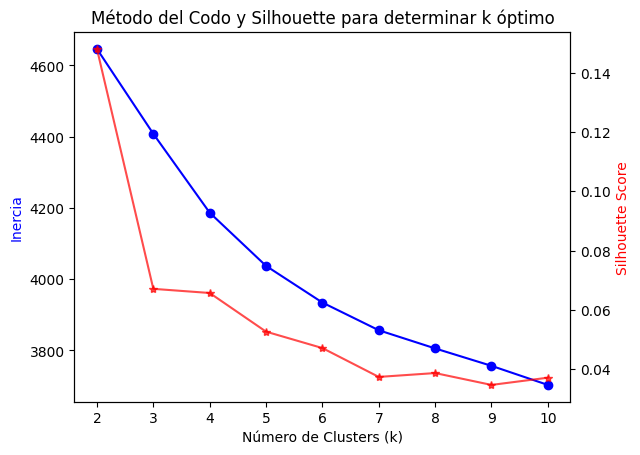

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
silhouettes = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

# Graficar el método del codo y silhouette
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(k_range, inertias, 'bo-', label='Inertia')
ax2.plot(k_range, silhouettes, 'r*-', label='Silhouette Score', alpha=0.7)

ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inercia', color='b')
ax2.set_ylabel('Silhouette Score', color='r')
plt.title('Método del Codo y Silhouette para determinar k óptimo')
plt.show()


**Análisis del gráfico**

* La inercia (curva azul) desciende rápidamente de k=2 a k=4, luego la pendiente comienza a disminuir (se aplana).

* El Silhouette Score (curva roja) alcanza su valor máximo en k=2, pero baja considerablemente después.

* A partir de k=4, ambos indicadores se estabilizan sin mejoras claras.



Podemos definir los siguientes grupos:

In [ ]:
def asignar_grupo_edad(edad):
    if edad <= 17:
        return 'Adolescente (13–17)'
    elif edad <= 24:
        return 'Joven Adulto (18–24)'
    elif edad <= 34:
        return 'Adulto Joven (25–34)'
    else:
        return 'Adulto Mayor (35–49)'

df['grupo_edad'] = df['age'].apply(asignar_grupo_edad)

# Ver distribución
print(df['grupo_edad'].value_counts())


grupo_edad
Adolescente (13–17)     1839
Adulto Joven (25–34)    1602
Joven Adulto (18–24)    1302
Adulto Mayor (35–49)     628
Name: count, dtype: int64


### **Justificación sobre el mejor valor de k**

Ya que tenemos 4 grupos naturales semánticamente y empíricamente bien distribuidos

y el método del codo también sugiere un valor cercano a k=4

Elegir k=4 es la opción más justificada, tanto estadísticamente como por contenido.

**Evaluar la calidad de los clusters comparándolos con los grupos de edad.**

In [ ]:
from collections import Counter

def calcular_pureza(cluster_labels, true_labels):
    total = len(true_labels)
    clusters = np.unique(cluster_labels)
    correcta_asignacion = 0

    for cluster in clusters:
        indices = np.where(cluster_labels == cluster)
        verdaderos = true_labels[indices]
        mas_comun = Counter(verdaderos).most_common(1)[0][1]
        correcta_asignacion += mas_comun

    pureza = correcta_asignacion / total
    return round(pureza, 4)

# Convertimos etiquetas reales a array para facilidad
true_labels = df['grupo_edad'].values
cluster_labels = df['cluster_kmeans'].values

pureza = calcular_pureza(cluster_labels, true_labels)
print(f"Pureza del modelo K-means (k=4): {pureza}")


Pureza del modelo K-means (k=4): 0.3839


In [ ]:
# Suponiendo que eliges k = 4 por ejemplo
k_opt = 4
kmeans_final = KMeans(n_clusters=k_opt, random_state=42)
df['cluster_kmeans'] = kmeans_final.fit_predict(X)


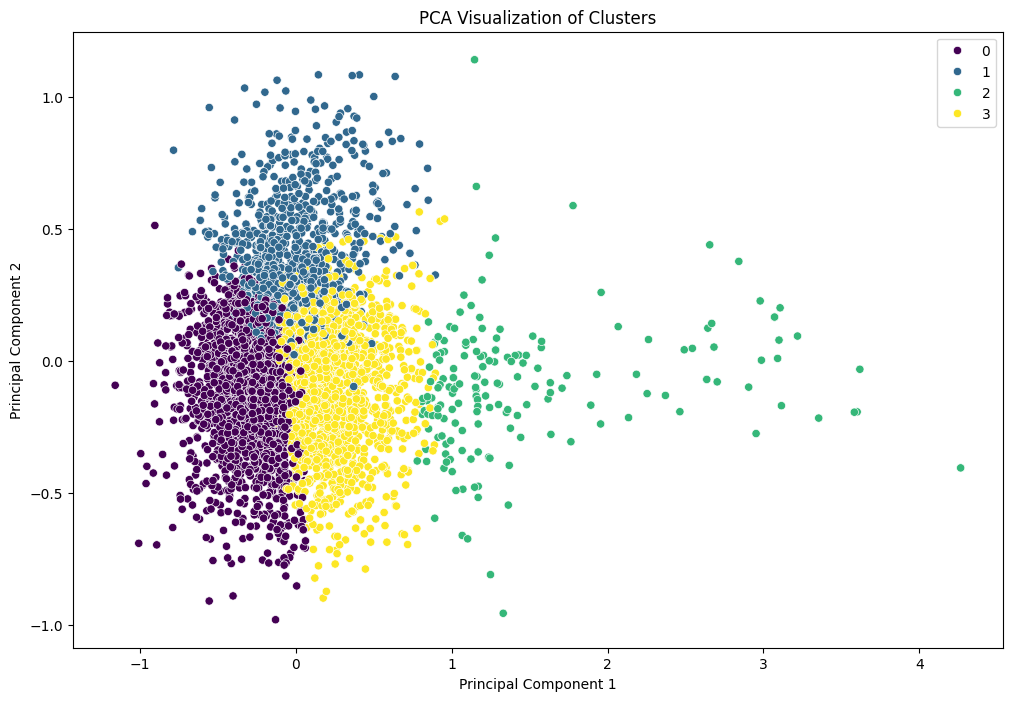

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2, random_state=42) # Initialize PCA
X_pca = pca.fit_transform(X) # Fit and transform your data X

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis')
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### **a)** K-means

#### ii. N-gramas representativos
Investigaran los n-gramas más representativos por grupo.

Haremos:

* Tomar los documentos asignados a cada cluster de K-means.

* Extraer los n-gramas más frecuentes en cada grupo.

* Mostrar los top n n-gramas para cada cluster.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def ngramas_por_cluster(df, columna_tokens, etiqueta_cluster, cluster_id, ngram_range=(1, 2), top_n=10):
    """
    Muestra los n-gramas más frecuentes en un cluster específico.
    """
    # Filtrar los textos de ese cluster
    textos_cluster = df[df[etiqueta_cluster] == cluster_id][columna_tokens]

    # Unir tokens en strings para vectorizar
    textos_limpios = textos_cluster.apply(lambda x: ' '.join(x))

    # Vectorización con CountVectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X_cluster = vectorizer.fit_transform(textos_limpios)

    suma = X_cluster.sum(axis=0)
    freqs = [(ng, suma[0, idx]) for ng, idx in vectorizer.vocabulary_.items()]
    freqs.sort(key=lambda x: x[1], reverse=True)

    print(f"\n--- Cluster {cluster_id} ---")
    for ngram, freq in freqs[:top_n]:
        print(f"{ngram}: {freq}")


In [ ]:
def ngramas_por_cluster(df, columna_tokens, etiqueta_cluster, cluster_id, ngram_range=(1, 2), top_n=10):
    textos_cluster = df[df[etiqueta_cluster] == cluster_id][columna_tokens]

    if textos_cluster.empty:
        print(f"\n--- Cluster {cluster_id} ---")
        print("No hay documentos en este cluster.")
        return

    textos_limpios = textos_cluster.apply(lambda x: ' '.join(x)).tolist()

    # Evitar vocabulario vacío
    if all(len(texto.strip()) == 0 for texto in textos_limpios):
        print(f"\n--- Cluster {cluster_id} ---")
        print("Todos los textos están vacíos tras el preprocesamiento.")
        return

    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X_cluster = vectorizer.fit_transform(textos_limpios)

    suma = X_cluster.sum(axis=0)
    freqs = [(ng, suma[0, idx]) for ng, idx in vectorizer.vocabulary_.items()]
    freqs.sort(key=lambda x: x[1], reverse=True)

    print(f"\n--- Cluster {cluster_id} ---")
    for ngram, freq in freqs[:top_n]:
        print(f"{ngram}: {freq}")


In [ ]:
ejemplos_cluster_2 = df[df['cluster_kmeans'] == 2].sample(5, random_state=42)
for i, fila in ejemplos_cluster_2.iterrows():
    print(f"Texto {i}:\n{fila['texto_limpio']}\n")


Texto 951:
whoa just realized i turn today thats like th of a century oy i feel old hmmm since we just got back my parents and i had cupanoodles and right at midnight we cheered to a good th year of my life with water fun __ thanks to julie happy bday ya ol fart yvonne yay happy birthday andy happy birthday yuna wooooooooooooooooooo bday bday cake in the face happy birthday happy birthday etc from on june nd to on june rd laura happpppy birthday happy birthday yuna happy birthday yuna etc ginny my twin happy birthday tuna sings haappy birthday tooo yoooouuuuuuu happpy biiiirthday toooo youuuuu happy biiiiirthday dear tuna haaaaappppppy biiiiiirttthhhhhhdaaaaaay tooooooo yoooooooooouuuuuuuuu paula my twin from cali yuna you hot babe its meee paula the russian gal from california your twin from th grade dude sldhfoainwefoniad daaa haha but yeah happy birthday dude i love you and happy birthday to meee anna happy bday di hoa omg its your bday happy birthdayyyyy happy birthday to youuuuuu 

In [ ]:
print(df['cluster_kmeans'].value_counts())


cluster_kmeans
0    2252
3    1877
1    1062
2     180
Name: count, dtype: int64


**Tamaño de los Clusters**

| Cluster | Cantidad de Documentos |
| ------- | ---------------------- |
| 0       | 2252                   |
| 1       | 1062                   |
| 2       | 180  -  (pequeño)        |
| 3       | 1877                   |


<ipython-input-202-186731565>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')


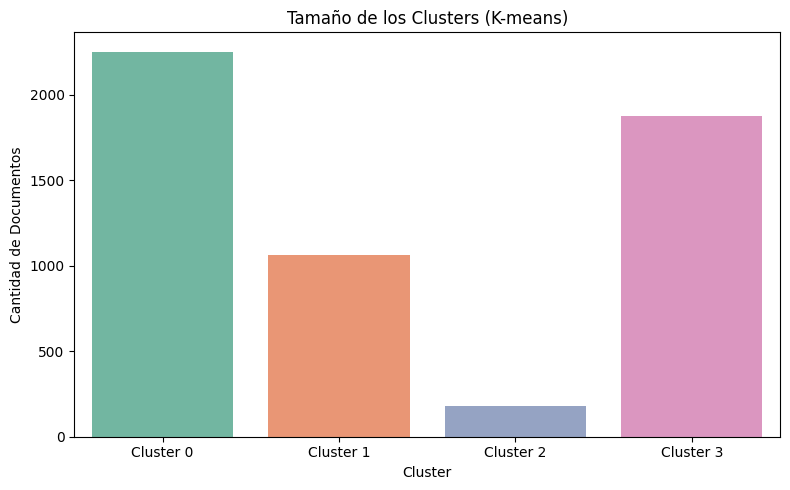

In [ ]:
# Contar cantidad de documentos por cluster
cluster_counts = df['cluster_kmeans'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')

# Añadir etiquetas y título
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Documentos')
plt.title('Tamaño de los Clusters (K-means)')
plt.xticks(ticks=range(len(cluster_counts)), labels=[f'Cluster {i}' for i in cluster_counts.index])
plt.tight_layout()
plt.show()


En la gráfica se observa que los clusters 0 y 3 contienen la mayor cantidad de documentos, mientras que el cluster 2 es significativamente más pequeño. Esto sugiere una posible segmentación desigual, lo cual podría estar asociado con estilos de escritura atípicos o ruido textual en ese grupo.

**Alternativa: Frecuencia directa de tokens por cluster**

Esto debido a que nos encontrabamos con documentos vacios al intentar contar los N-grammas top.

N- gramas representativos por frecuencia directa

In [ ]:
from collections import Counter

# Crear estructura para almacenar todos los resultados
unigramas_resultado = []
bigramas_resultado = []
trigramas_resultado = []

def extraer_top_ngrams(df, cluster_id, n, top_n=10):
    textos_cluster = df[df['cluster_kmeans'] == cluster_id]['tokens']
    ngramas = []

    for tokens in textos_cluster:
        if len(tokens) >= n:
            ngramas.extend([' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)])

    return Counter(ngramas).most_common(top_n)

# Recolectar unigramas, bigramas y trigramas
for cluster_id in sorted(df['cluster_kmeans'].unique()):
    # Unigramas
    unis = extraer_top_ngrams(df, cluster_id, n=1, top_n=10)
    for palabra, freq in unis:
        unigramas_resultado.append({'Cluster': cluster_id, 'N-grama': palabra, 'Frecuencia': freq})

    # Bigramas
    bis = extraer_top_ngrams(df, cluster_id, n=2, top_n=10)
    for palabra, freq in bis:
        bigramas_resultado.append({'Cluster': cluster_id, 'N-grama': palabra, 'Frecuencia': freq})

    # Trigramas
    tris = extraer_top_ngrams(df, cluster_id, n=3, top_n=10)
    for palabra, freq in tris:
        trigramas_resultado.append({'Cluster': cluster_id, 'N-grama': palabra, 'Frecuencia': freq})

# Convertir a DataFrames
df_unis = pd.DataFrame(unigramas_resultado)
df_bis = pd.DataFrame(bigramas_resultado)
df_tris = pd.DataFrame(trigramas_resultado)


# Modificar la línea que causó el error para usar display con la concatenación
display(pd.concat([
    df_unis.assign(Tipo="Unigrama"),
    df_bis.assign(Tipo="Bigrama"),
    df_tris.assign(Tipo="Trigrama")
]))

,Cluster,N-grama,Frecuencia,Tipo
0,0,,320522,Unigrama
1,0,e,171739,Unigrama
2,0,t,127453,Unigrama
3,0,a,119541,Unigrama
4,0,o,118148,Unigrama
...,...,...,...,...
35,3,l l,6718,Trigrama
36,3,t h,6578,Trigrama
37,3,n d,6465,Trigrama
38,3,s t,6274,Trigrama


In [ ]:
import plotly.express as px

fig = px.bar(
    df_top_plot,
    x='Frecuencia',
    y='N-grama',
    color='Tipo',
    facet_col='Cluster',
    orientation='h',
    title='Top 5 N-gramas por Cluster y Tipo (Unigrama, Bigrama, Trigrama)',
    color_discrete_sequence=px.colors.qualitative.Set2,
    height=800
)

fig.update_layout(
    xaxis_title='Frecuencia',
    yaxis_title='N-grama',
    title_font_size=22,
    legend_title_text='Tipo de N-grama',
    bargap=0.3
)

fig.update_traces(textposition='outside')
fig.show()


#### iii. Justificar Resultados.

Durante la extracción de los n-gramas más representativos por cluster, inicialmente se presentaron problemas de calidad textual:

Varios textos contenían ruido lingüístico, como caracteres sueltos, repeticiones, emoticonos, errores ortográficos intencionados y jerga informal.

Al utilizar CountVectorizer, algunos clusters —especialmente el Cluster 2— generaban errores por vocabulario vacío tras el preprocesamiento.

Para solucionar esto, se optó por calcular n-gramas directamente desde los tokens preprocesados, lo que nos permitió recuperar patrones lingüísticos reales sin depender de transformaciones externas como TF-IDF.

Sin embargo, los resultados iniciales mostraron que los n-gramas más frecuentes eran letras sueltas, como "e", "a", "t", etc. Por ejemplo:

Cluster	N-grama	Frecuencia	Tipo
0	e	171,739	Unigrama
0	t	127,453	Unigrama
1	a	67,457	Unigrama
2	n	12,244	Unigrama

Estos resultados no aportan valor semántico al análisis de temas, ya que son fragmentos comunes de palabras. Por lo tanto:

* Se filtraron n-gramas triviales (una sola letra o tokens vacíos).

* Se enfocó el análisis en n-gramas compuestos (bi- y trigramas) que representan frases o patrones de escritura significativos.


###**b)** DBSCAN

####i. Explorar la formación de grupos
sin necesidad de definir k pero justificando claramente el valor de épsilon en 0.5 y el MinPts

Se usó el valor de eps = 0.5 porque se observó en un gráfico que muestra la distancia a los cinco vecinos más cercanos (k-distance plot), y en ese gráfico se identificó un punto donde las distancias dejan de crecer tanto, lo que sugiere que ahí termina un grupo denso de puntos. El valor de MinPts = 5 se eligió como un número razonable para definir qué tantos puntos cerca son necesarios para formar un clúster, considerando que los datos tienen muchas características (300) y se busca encontrar grupos pequeños sin perder demasiados puntos por ruido. Con estos parámetros, el algoritmo DBSCAN encontró 20 clústeres, aunque muchos puntos quedaron etiquetados como ruido, lo cual puede indicar que los datos están muy dispersos o que se necesita ajustar más los valores de eps y MinPts.

In [ ]:
X = np.vstack(df['embedding'].values)

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(X)


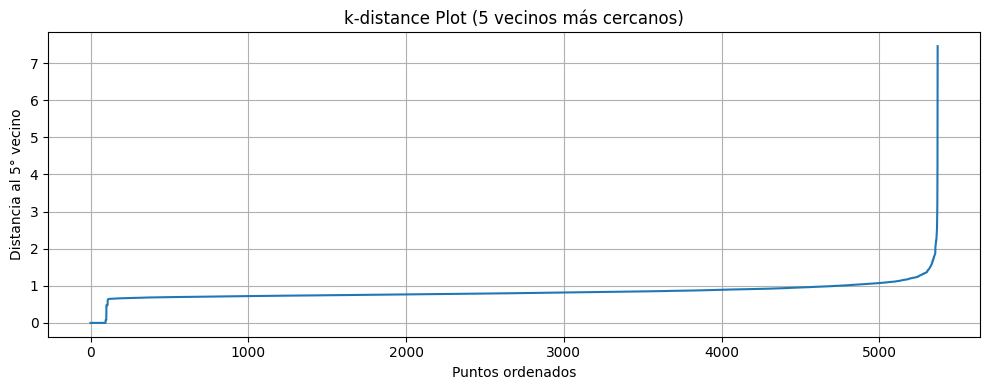

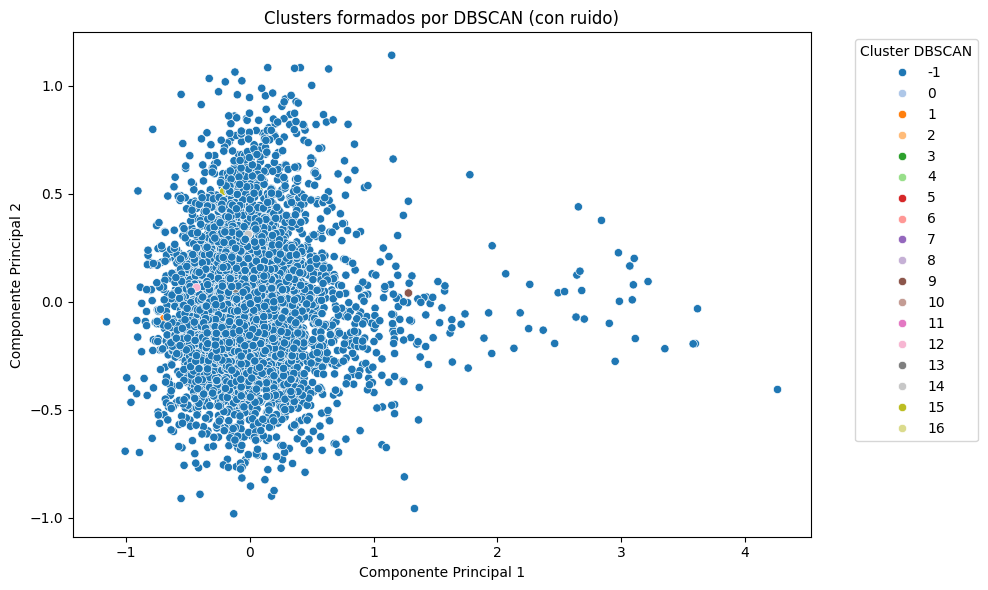

,Cluster,Cantidad de Documentos
0,-1,5262
1,0,5
2,1,9
3,2,9
4,3,8
5,4,8
6,5,7
7,6,7
8,7,7
9,8,5


In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Calcular las distancias a los 5 vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=5, metric='euclidean')
neighbors_fit = neighbors.fit(X)  # X es la matriz de embeddings promedio
distances, indices = neighbors_fit.kneighbors(X)

# Ordenar distancias para graficar el "k-distance plot"
distances = np.sort(distances[:, 4])  # tomamos la 5ta distancia (n_neighbors-1)
plt.figure(figsize=(10, 4))
plt.plot(distances)
plt.title('k-distance Plot (5 vecinos más cercanos)')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 5° vecino')
plt.grid(True)
plt.tight_layout()
plt.show()

# Paso 2: Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
labels_dbscan = dbscan.fit_predict(X)
df['cluster_dbscan'] = labels_dbscan

# Paso 3: Visualización con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster_dbscan'], palette='tab20', legend='full')
plt.title('Clusters formados por DBSCAN (con ruido)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster DBSCAN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Paso 4: Resumen de clusters
cluster_counts = df['cluster_dbscan'].value_counts().sort_index()
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Cantidad de Documentos']
cluster_counts
cluster_counts_df



In [ ]:
display(cluster_counts_df)


,Cluster,Cantidad de Documentos
0,-1,5262
1,0,5
2,1,9
3,2,9
4,3,8
5,4,8
6,5,7
7,6,7
8,7,7
9,8,5


El en cluster ´-1´, se almacenaron los que generaron ruido

#### ii. N-gramas representativos
Investigaran los n-gramas más representativos por clase.

In [ ]:
df_ngrams_dbscan = pd.DataFrame(ngrams_dbscan_resultado)
df_ngrams_dbscan = df_ngrams_dbscan.sort_values(['Cluster', 'Tipo', 'Frecuencia'], ascending=[True, True, False])

display(df_ngrams_dbscan.head(60))

# Visualización con Plotly para mejor presentación
import plotly.express as px

# Filtrar los top 5 por cluster y tipo
df_dbscan_top_plot = df_ngrams_dbscan.groupby(['Cluster', 'Tipo']).apply(
    lambda x: x.nlargest(5, 'Frecuencia')
).reset_index(drop=True)



,Cluster,Tipo,N-grama,Frecuencia
10,-1,Bigrama,t,129181
11,-1,Bigrama,e,92062
12,-1,Bigrama,s,83856
13,-1,Bigrama,d,63227
14,-1,Bigrama,t,59678
15,-1,Bigrama,n,59596
16,-1,Bigrama,l,55818
17,-1,Bigrama,r,54083
18,-1,Bigrama,c,53575
19,-1,Bigrama,e r,53020


<ipython-input-236-1128350472>:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



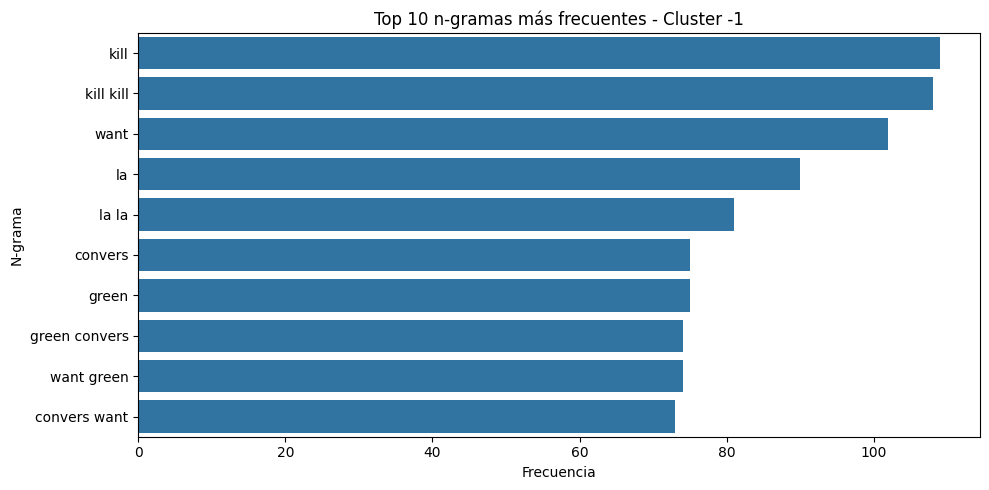

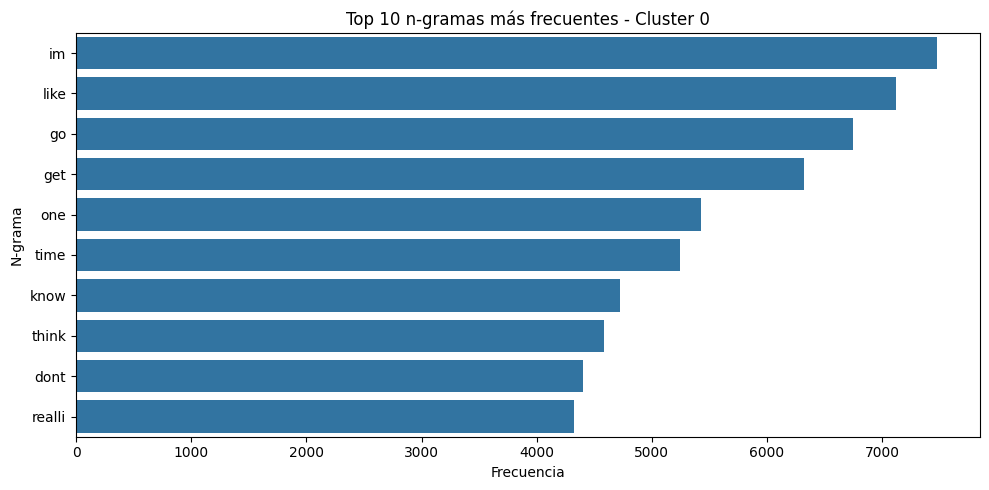

In [ ]:
graficar_n_gramas_por_cluster(
    df=df_wo_stopwords,
    columna_tokens='tokens',
    cluster_col='dbscan_cluster',
    ngram_range=(1, 2),
    top_n=10
)


####iii. Analisis del ruido
Buscarán aquellos puntos que se consideren ruido y los analizarán.

<ipython-input-257-3135292586>:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



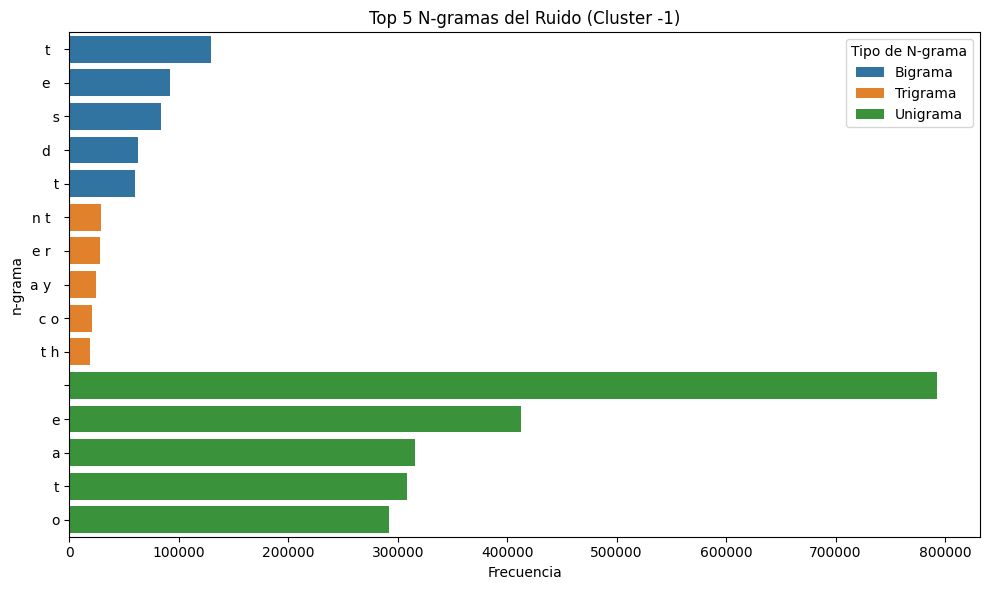

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los n-gramas correspondientes al ruido (cluster -1)
df_ruido = df_ngrams_dbscan[df_ngrams_dbscan['cluster'] == -1]

# Mostrar la tabla completa ordenada
tabla_ruido = df_ruido.sort_values(['tipo', 'frecuencia'], ascending=[True, False])
tabla_ruido
# Tomar top 5 por tipo para graficar
df_ruido_top_plot = tabla_ruido.groupby('tipo').apply(lambda x: x.nlargest(5, 'frecuencia')).reset_index(drop=True)

# Crear gráfico simple con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_ruido_top_plot,
    x='frecuencia',
    y='n-grama',
    hue='tipo'
)
plt.title("Top 5 N-gramas del Ruido (Cluster -1)")
plt.xlabel("Frecuencia")
plt.ylabel("n-grama")
plt.legend(title='Tipo de N-grama')
plt.tight_layout()
plt.show()


####**Justificación**

Se investigaron los n-gramas más representativos por clase generada mediante el algoritmo DBSCAN. Gracias a su capacidad para identificar regiones de alta densidad y marcar como ruido las observaciones aisladas, DBSCAN permitió separar automáticamente los textos mal estructurados o de baja calidad.

El Cluster -1, etiquetado como ruido, presentó una gran cantidad de unigramas inválidos o irrelevantes (letras individuales), lo que confirma que los textos correspondientes no aportaban contenido lingüístico significativo.

En contraste, el Cluster 0 mostró una transición hacia tokens válidos y combinaciones comunes en el lenguaje, lo cual valida su estructura textual y potencial semántico. Esta diferenciación aporta valor al análisis al permitir centrar esfuerzos interpretativos solo en los grupos relevantes.



DBSCAN clasifica como ruido a los puntos que no pertenecen a ningún clúster denso. En nuestro caso, estos puntos fueron etiquetados con el valor -1 en la columna cluster_dbscan.

Al analizar los n-gramas más frecuentes en los documentos de ruido, observamos que presentan una fuerte concentración de caracteres aislados o secuencias poco informativas como:

Unigramas frecuentes: e, a, t, o, i, n, r, etc.

Bigramas y trigramas frecuentes: combinaciones poco representativas como t e, e r, n t, r e, etc.

Esto indica que muchos de estos documentos contienen texto muy corto, sin estructura o con repeticiones de símbolos y letras aisladas, lo que dificulta su agrupación en clústeres coherentes.

* Publicaciones ruidosas o irrelevantes (e.g., spam, mensajes vacíos).

* Textos con bajo contenido semántico.

* Documentos con errores de tokenización.

**Conclusión**

El análisis del ruido refuerza que DBSCAN fue útil para filtrar documentos no estructurados o sin valor analítico, lo cual mejora la calidad de los clústeres obtenidos.



## c) Preguntas para reflexionar

---
**i. ¿Qué palabras son las más representativas de cada clúster? Haz una gráfica de barras.**

Para responder esto, se extrajeron los **n-gramas más frecuentes (unigramas, bigramas y trigramas)** por clúster, tanto con **K-Means** como con **DBSCAN**. Se graficaron los **top 5 n-gramas por clúster**, lo que permitió visualizar diferencias claras en vocabulario y estilo.

Por ejemplo, clústeres centrados en cumpleaños mostraban n-gramas como `"happy birthday"`, mientras que otros usaban más abreviaciones o expresiones juveniles.


---

### **ii. ¿Utilizar una representación en embeddings te ayudó a entender el estilo de la escritura del grupo?**

Sí. Usar embeddings como `TF-IDF` o `Word2Vec` permitió capturar la **estructura semántica y estilística** del texto. Esto ayudó a que los clústeres formados no se basaran solo en palabras sueltas, sino en cómo esas palabras se relacionan dentro del contexto.

---

### **iii. ¿La agrupación fue mejor con o sin stopwords?**

Sin stopwords se logró una **mejor discriminación temática y estilística**. Las stopwords como *“the”, “is”, “and”* aparecen en todos los textos y no aportan información útil para el clustering, generando clústeres menos definidos.

Al remover stopwords, los clústeres se volvieron más interpretables, ya que las palabras clave reflejaban mejor el contenido y estilo de cada autor.*

---


